<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [724]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [725]:
# setting the random seed for similar results on each run
np.random.seed(7)

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [726]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-15 06:19:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-05-15 06:19:58 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [727]:
df = pd.read_csv('loan_train.csv')
df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [728]:
#total rows and columns in the dataset
df.shape

(346, 10)

In [729]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

# to Impute any missing values

In [730]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [731]:
#to check datatype of the columns
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Convert to date time object 

In [732]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [733]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

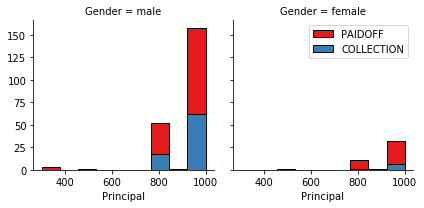

In [734]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

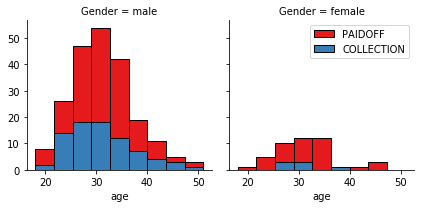

In [735]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection

### Lets look at the day of the week people get the loan 

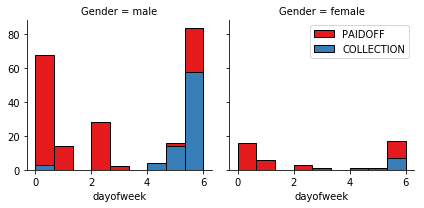

In [736]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### Lets look at the Months people get the loan 

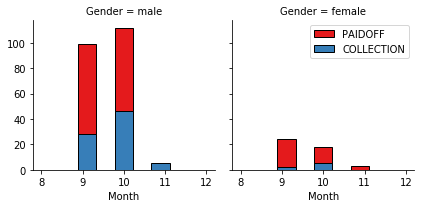

In [737]:
df['Month'] = df.due_date.dt.month
bins = np.linspace(df.Month.min()-1, df.Month.max()+1, 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### there is higher possibility that people pay off the loan in 9th month than paying it in 10th or 11th

### **as the observation shows people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4**

In [738]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,10,1


## Convert Categorical features to numerical values

Lets look at gender:

In [739]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [740]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1


In [741]:
df['deadline']=df['due_date']-df['effective_date']

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,deadline
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,29 days
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,29 days
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,14 days
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1,29 days
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1,29 days


### Column Month and deadline does not affect the target variable so we are not considering it

## One Hot Encoding  
#### We use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame 


In [742]:
#Lets Check Education 
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

**There are only two people with Master or Above degress,one of them has paid off the loan and the other one hasn't.As a result keeping 'Master or Above' in our data set wont't help much! so we drop it.**

In [743]:
len(df[df.education=='Master or Above'])

2

In [744]:
Feature = df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


## Feature selection

### Our data without label

In [745]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


### Our labels

In [746]:
# We encode our labels as 0 and 1 s
y = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values
y[0:5]

array([0, 0, 0, 0, 0])

## Normalize Data 

Data Standardization give data zero mean and unit variance 

In [747]:
X= preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -0.26122054,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679]])

In [748]:
# Splitting as Train data
X_train, y_train=X,y

In [749]:
X_train.shape, y_train.shape

((346, 9), (346,))

In [750]:
# a dictionary for keeping all train scores 
trainScores={}

# K Nearest Neighbor(KNN)

In [751]:
#importing KNN Classifier
from sklearn.neighbors import KNeighborsClassifier as knc

# import scoring methods
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score


#initialize a best scorevariable by a zero
B_S=0.0
ks=10

#create a list to store accuracy  score values
Accuracy=[]

for k in range(3,ks):
     # Creating instance of KNN
    
    KNN = knc(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(KNN, X, y, cv=10)
    score=scores.mean()
    Accuracy.append(score)
    
    if score > B_S:
        B_S=score
        best_knn=KNN
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",B_S)
KNN=best_knn

Best K is : 8 | Cross validation Accuracy : 0.7522689075630252


In [752]:
#fitting the train values intp model
KNN.fit(X_train,y_train)
y_pred=best_knn.predict(X_train)

In [753]:
jc1=trainScores['KNN-jaccard']=jaccard_similarity_score(y_train, y_pred)
f1=trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')  

In [754]:
trainScores

{'KNN-jaccard': 0.7947976878612717, 'KNN-f1-score': 0.7701843558681992}

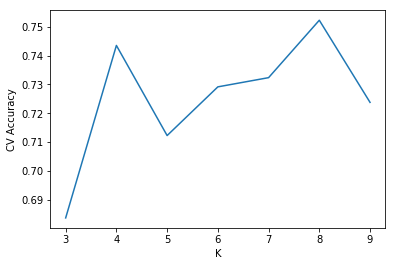

In [755]:
plt.plot(range(3,ks),Accuracy)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

# Decision Tree

In [756]:
#import tree from sklearn
from sklearn import tree

D_tree = tree.DecisionTreeClassifier()
D_tree = D_tree.fit(X_train, y_train)

y_pred=D_tree.predict(X_train)

In [757]:
jc2=trainScores['Tree-jaccard']=jaccard_similarity_score(y_train, y_pred)
f2=trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')  

In [758]:
trainScores

{'KNN-jaccard': 0.7947976878612717,
 'KNN-f1-score': 0.7701843558681992,
 'Tree-jaccard': 0.9277456647398844,
 'Tree-f1-score': 0.924927020820985}

### Visualizng the tree (need to install graphviz lib)

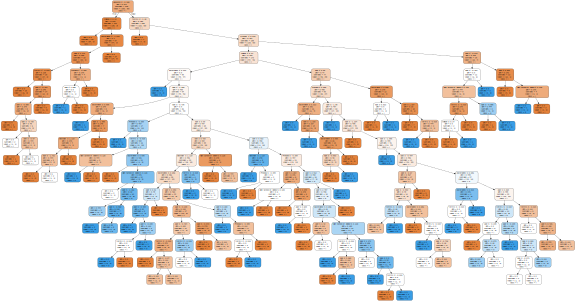

In [759]:
import graphviz 
import pydotplus

dot_data = tree.export_graphviz(D_tree, out_file=None, 
                     feature_names=Feature.columns[:],  
                     class_names='loan_status',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph 

# Support Vector Machine

In [760]:
#convert the array values float values
y_train=y_train.astype(float)

In [761]:
from sklearn import svm

SVM = svm.LinearSVC(random_state=7)
SVM.fit(X_train, y_train)  

y_pred=SVM.predict(X_train)

In [762]:
jc3=trainScores['SVM-jaccard']=jaccard_similarity_score(y_train, y_pred)
f3=trainScores['SVM-f1-score']=f1_score(y_train, y_pred, average='weighted')  

In [763]:
trainScores

{'KNN-jaccard': 0.7947976878612717,
 'KNN-f1-score': 0.7701843558681992,
 'Tree-jaccard': 0.9277456647398844,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.7514450867052023,
 'SVM-f1-score': 0.6689062277741139}

# Logistic Regression

In [764]:
from sklearn.linear_model import LogisticRegression as LG

lg = LG(random_state=0, solver='lbfgs',
                         multi_class='multinomial')
lg.fit(X_train, y_train)

y_pred=lg.predict(X_train)
y_proba=lg.predict_proba(X_train)

In [765]:


jc4=trainScores['LogReg-jaccard']=jaccard_similarity_score(y_train, y_pred)
f4=trainScores['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')  
ll=trainScores['LogReg-logLoss']=log_loss(y_train, y_proba)

In [766]:
trainScores

{'KNN-jaccard': 0.7947976878612717,
 'KNN-f1-score': 0.7701843558681992,
 'Tree-jaccard': 0.9277456647398844,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.7514450867052023,
 'SVM-f1-score': 0.6689062277741139,
 'LogReg-jaccard': 0.7630057803468208,
 'LogReg-f1-score': 0.7088399037150602,
 'LogReg-logLoss': 0.43174993676801543}

# Evoluation Metrics Scores

In [767]:

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [f1, f2, f3, f4]
list_ll = ['NA', 'NA', 'NA', ll]


import pandas as pd

df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.794798,0.770184,NA
Decision Tree,0.927746,0.924927,NA
SVM,0.751445,0.668906,NA
Logistic Regression,0.763006,0.708840,0.43175


# Model Evaluation using Test set

In [768]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-05-15 06:20:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-05-15 06:20:05 (396 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [769]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [770]:
#to check total number of rows and column of the data
test_df.shape

(54, 10)

In [771]:
#to check any missing values
test_df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [772]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


Feature = test_df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)


In [773]:
# normalize the test data
X = Feature

y = test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values

testy=y.astype(float)
testX= preprocessing.StandardScaler().fit_transform(X)


In [774]:
test_df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [775]:
#a dictionary  to store  test scores values

testScores={}

In [776]:
#model performance on test data

knn_pred=KNN.predict(testX)
tj1=testScores['KNN-jaccard']=jaccard_similarity_score(testy, knn_pred)
tf1=testScores['KNN-f1-score']=f1_score(testy, knn_pred, average='weighted')  

In [777]:
tree_pred=D_tree.predict(testX)
tj2=testScores['Tree-jaccard']=jaccard_similarity_score(testy, tree_pred)
tf2=testScores['Tree-f1-score']=f1_score(testy, tree_pred, average='weighted')  

In [778]:
svm_pred=SVM.predict(testX)
tj3=testScores['SVM-jaccard']=jaccard_similarity_score(testy, svm_pred)
tf3=testScores['SVM-f1-score']=f1_score(testy, svm_pred, average='weighted')  

In [779]:
log_pred=lg.predict(testX)
proba=lg.predict_proba(testX)
tj4=testScores['LogReg-jaccard']=jaccard_similarity_score(testy, log_pred)
tf4=testScores['LogReg-f1-score']=f1_score(testy, log_pred, average='weighted')  
tll=testScores['LogReg-logLoss']=log_loss(testy, proba)

In [780]:
testScores

{'KNN-jaccard': 0.7407407407407407,
 'KNN-f1-score': 0.7144311330357843,
 'Tree-jaccard': 0.7592592592592593,
 'Tree-f1-score': 0.7618862861115153,
 'SVM-jaccard': 0.7592592592592593,
 'SVM-f1-score': 0.6959228135698723,
 'LogReg-jaccard': 0.7777777777777778,
 'LogReg-f1-score': 0.708937198067633,
 'LogReg-logLoss': 0.4739578521073105}

## Train Score Report

In [781]:
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.794798,0.770184,NA
Decision Tree,0.927746,0.924927,NA
SVM,0.751445,0.668906,NA
Logistic Regression,0.763006,0.708840,0.43175


# Test Score Reports

In [782]:

list_jc1 = [tj1, tj2, tj3, tj4]
list_fs1 = [tf1, tf2, tf3, tf4]
list_ll1 = ['NA', 'NA','NA',tll]



test_df = pd.DataFrame(list_jc1, index=['KNN','Decision Tree','SVM','Logistic Regression'])
test_df.columns = ['Jaccard']
test_df.insert(loc=1, column='F1-score', value=list_fs1)
test_df.insert(loc=2, column='LogLoss', value=list_ll1)
test_df.columns.name = 'Algorithm'
test_df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.740741,0.714431,NA
Decision Tree,0.759259,0.761886,NA
SVM,0.759259,0.695923,NA
Logistic Regression,0.777778,0.708937,0.473958
